In [2]:
import pandas as pd

# walk pocket (Zijie) 2024-06-07 22-38-35

# Load each dataset
proximity = pd.read_csv('/Users/vaji/Documents/01 VU-Uni/P6/ML4QS/walk/Proximity.csv')
location = pd.read_csv('/Users/vaji/Documents/01 VU-Uni/P6/ML4QS/walk/Location.csv')
linear_accelerometer = pd.read_csv('/Users/vaji/Documents/01 VU-Uni/P6/ML4QS/walk/Linear Accelerometer.csv')
gyroscope = pd.read_csv('/Users/vaji/Documents/01 VU-Uni/P6/ML4QS/walk/Gyroscope.csv')
accelerometer = pd.read_csv('/Users/vaji/Documents/01 VU-Uni/P6/ML4QS/walk/Accelerometer.csv')


In [3]:
# Example for one dataset
print(accelerometer.describe())
print(accelerometer.isnull().sum())


           Time (s)     X (m/s^2)     Y (m/s^2)     Z (m/s^2)
count  21901.000000  21901.000000  21901.000000  21901.000000
mean     108.947565     -0.926662    -10.291436     -0.154518
std       62.903243      4.683030      7.845514      7.206947
min        0.001624    -24.843837    -56.331159    -41.241638
25%       54.475839     -4.199667    -14.729370     -3.842060
50%      108.948278     -0.446222    -10.092313      1.184038
75%      163.419684      2.499951     -4.944967      4.949308
max      217.890572     21.730461      9.621991     21.308189
Time (s)     0
X (m/s^2)    0
Y (m/s^2)    0
Z (m/s^2)    0
dtype: int64


In [19]:
# Apply a rolling mean with a window of 3 samples
accelerometer['X (m/s^2)'] = accelerometer['X (m/s^2)'].rolling(window=3, min_periods=1).mean()
accelerometer['Y (m/s^2)'] = accelerometer['Y (m/s^2)'].rolling(window=3, min_periods=1).mean()
accelerometer['Z (m/s^2)'] = accelerometer['Z (m/s^2)'].rolling(window=3, min_periods=1).mean()


In [10]:
print(accelerometer.head())
print(accelerometer.describe())


   Time (s)  X (m/s^2)  Y (m/s^2)  Z (m/s^2)
0  0.001624  -1.623075   3.218158   7.573651
1  0.011574  -1.437087   3.339555   7.396419
2  0.021524  -1.329086   3.439448   7.348668
3  0.031474  -1.226749   3.541086   7.260502
4  0.041423  -1.389211   3.447780   7.298672
           Time (s)     X (m/s^2)     Y (m/s^2)     Z (m/s^2)
count  21901.000000  21901.000000  21901.000000  21901.000000
mean     108.947565     -0.926531    -10.291652     -0.154611
std       62.903243      4.421122      7.321437      6.797265
min        0.001624    -22.390239    -43.664150    -31.877860
25%       54.475839     -4.113895    -14.803915     -3.709237
50%      108.948278     -0.491179    -10.210417      0.959056
75%      163.419684      2.444716     -5.254523      4.905200
max      217.890572     17.766804      8.860275     15.344890


In [11]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(accelerometer[['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)']]))
threshold = 3  # Typically, a Z-score above 3 is considered an outlier

# Filter out the outliers
accelerometer_clean = accelerometer[(z_scores < threshold).all(axis=1)]

# Check how much data remains
print(f"Original data points: {len(accelerometer)}, Cleaned data points: {len(accelerometer_clean)}")


Original data points: 21901, Cleaned data points: 21220


In [12]:
print(accelerometer_clean.describe())


           Time (s)     X (m/s^2)     Y (m/s^2)     Z (m/s^2)
count  21220.000000  21220.000000  21220.000000  21220.000000
mean     108.941798     -0.891965     -9.840926      0.492749
std       62.838279      4.352722      6.796012      5.693118
min        0.001624    -14.150574    -32.208372    -20.505858
25%       54.592744     -4.071745    -14.484242     -3.163509
50%      108.923405     -0.427511     -9.965003      1.203597
75%      163.243088      2.477648     -4.961133      4.978472
max      217.890572     12.291739      8.860275     15.344890


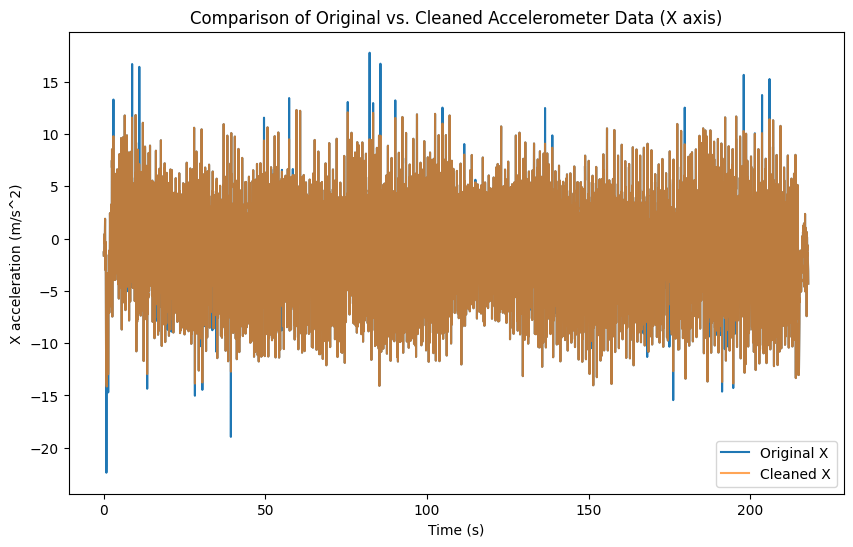

In [13]:
import matplotlib.pyplot as plt

# Plot before cleaning
plt.figure(figsize=(10, 6))
plt.plot(accelerometer['Time (s)'], accelerometer['X (m/s^2)'], label='Original X')
plt.plot(accelerometer_clean['Time (s)'], accelerometer_clean['X (m/s^2)'], label='Cleaned X', alpha=0.7)
plt.title('Comparison of Original vs. Cleaned Accelerometer Data (X axis)')
plt.xlabel('Time (s)')
plt.ylabel('X acceleration (m/s^2)')
plt.legend()
plt.show()
